,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,time,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,00:00:00,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,01:00:00,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,02:00:00,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,03:00:00,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,04:00:00,0,0


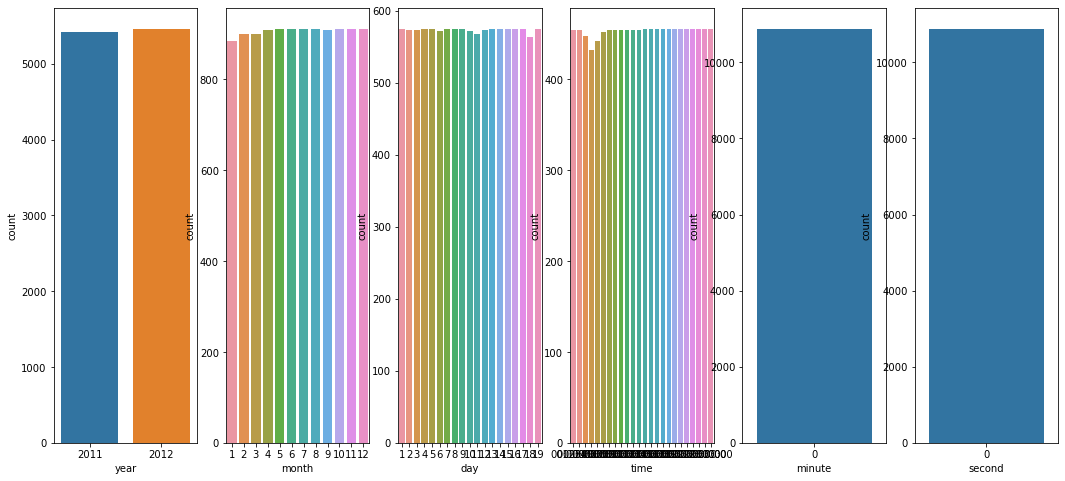

In [160]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('~/aiffel/bike-sharing-demand/train.csv')

train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['time'] = pd.DatetimeIndex(train['datetime']).time
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second


fig,ax = plt.subplots(1,6, figsize = (18, 8))

sns.countplot(train['year'], ax = ax[0])
sns.countplot(train['month'], ax = ax[1])
sns.countplot(train['day'], ax = ax[2])
sns.countplot(train['time'], ax = ax[3])
sns.countplot(train['minute'], ax = ax[4])
sns.countplot(train['second'], ax = ax[5])

train.head()


In [72]:
train = train[['year','month','day','time'
               ,'season','holiday','workingday','weather','temp','windspeed','count']]
train.head()

,year,month,day,time,season,holiday,workingday,weather,temp,windspeed,count
0,2011,1,1,00:00:00,1,0,0,1,9.84,0.0,16
1,2011,1,1,01:00:00,1,0,0,1,9.02,0.0,40
2,2011,1,1,02:00:00,1,0,0,1,9.02,0.0,32
3,2011,1,1,03:00:00,1,0,0,1,9.84,0.0,13
4,2011,1,1,04:00:00,1,0,0,1,9.84,0.0,1


In [162]:
X = train[['year','month','day'
               ,'season','holiday','workingday','humidity','weather','temp','windspeed']].values
y = train['count'].values

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,time,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,00:00:00,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,01:00:00,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,02:00:00,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,03:00:00,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,04:00:00,0,0


In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5000)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 10) (8708,)
(2178, 10) (2178,)


In [164]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions


array([ 53.011763  , 212.36677568, 392.33381198, ..., 251.76901613,
       307.64883019, 144.0568125 ])

In [165]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse


rmse = mean_squared_error(y_test, predictions, squared=False)
rmse


143.01652368073275

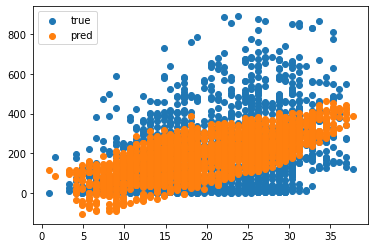

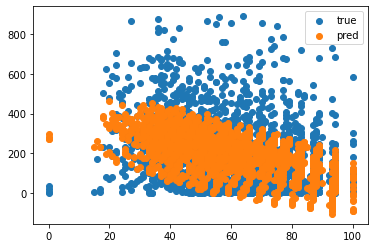

In [171]:
#1 temp

plt.scatter(X_test[:,8],y_test, label = "true")
plt.scatter(X_test[:,8], predictions, label = "pred")
plt.legend()
plt.show()

#2 humidity

plt.scatter(X_test[:,6],y_test, label = "true")
plt.scatter(X_test[:,6], predictions, label = "pred")
plt.legend()
plt.show()

첫번째 Diabetes 는 LEARNING_RATE 을 높혀주었더니 MSE 가 더 줄어들었습니다. 
Diabetes 와 달리 Bike 는 데이터 시각화에 대한것들을 배울수 있었습니다. 
Diabetes 에서 기본적인 모델을 짜면서 이해했던 내용으로 Bike 문제를 푸는 방식이라 이해가 조금더 잘되었습니다.
Bike 에서 RMSE 는 단순히 루트를 씌운거라고 생각해서 squared = False 로 하였고, X 축에 조금더 많은 변수를 넣을수록, random_state 를 높힐수록 RMSE 는 줄어드는것을 알수 있었습니다.